# TP déconvolution - estimation par pénalisation

Dans ce TP, on s'intéresse à l'estimation d'un signal $\mathbf x$ à partir d'une observation $\mathbf s$, modélisée comme la convolution de $\mathbf x$ avec une réponse impulsionnelle $\mathbf h$.
Nous testerons, suivant les propriétés supposées de $\mathbf x$, différents termes de pénalisation.

In [1]:
# Chargement des packages

import numpy as np
from scipy.io import loadmat
import cvxpy as cp
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.linalg as la
import scipy.signal as si

# Chargement des données
mfile = loadmat('signaux1D.mat')

h = mfile['h'].ravel()
m1 = mfile['m1'].ravel()
m2 = mfile['m2'].ravel()
m3 = mfile['m3'].ravel()

L = 99;

## Maximum de vraisemblance

On suppose que l'observation s'écrit
$$\mathbf s = \mathbf h \star \mathbf x + \mathbf b$$
où $\mathbf b$ est un vecteur gaussien de matrice de covariance $\sigma^2 I$.

**Question 1** : donner la densité de probabilité $p_{\mathbf x}$ de $\mathbf s$ paramétrée par $\mathbf x$, et en déduire la forme de l'estimateur par maximum de vraisemblance $\hat{ \mathbf x}^{MV}$. 

**Question 2** ; lire, comprendre et exécuter le code ci-dessous. Remarque : la convolution se calcule avec la fonction adéquate (`np.convolve`, `scipy.signal.convolve`, ou `cp.conv`), soit en construisant la matrice de Toeplitz $\mathbf H$ associée.

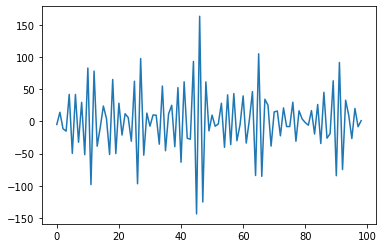

In [12]:
# Exemple : maximum de vraisemblance

# on choisit une des données
data = m1;

# variable du problème
x = cp.Variable(L)

# fonction objectif
objective = cp.Minimize( cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)))
# /!\ cp.conv renvoie un tableau 2D

# constraintes
constraints = []

# définition du problème
prob = cp.Problem(objective, constraints)

# résolution
result = prob.solve()

# visualisation
plt.plot(x.value);

## Conditionnement du problème

**Question 3** : analyser le conditionnement du problème direct. Deux options : en calculant les valeurs singulières de $\mathbf H$, ou la réponse fréquentielle de $\mathbf h$.

In [17]:
# réponse fréquentielle
Nfft = 1000;
hfft = fft.fft(h, Nfft)
#...
modules = np.absolute(hfft)
print(f"conditionnement selon l'analyse fréquentielle est {max(modules) / min(modules)}")


# matrice de Toeplitz
H = la.toeplitz(np.hstack([h, np.zeros([L-1])]), np.hstack([h[0],  np.zeros([L-1])]))
#...
val = la.svd(H)[1]
print(f"conditionnement selon l'analyse matricielle est {val[0] / val[-1]}")


conditionnement selon l'analyse fréquentielle est 5.1498306677534984e+16
conditionnement selon l'analyse matricielle est 5815.023117952654


## Régularisation

Les informations a priori suivantes sont disponibles :
- la mesure $\mathbf s_1$ est associée à une signal à variations lentes,
- la mesure $\mathbf s_2$ à un signal composée de quelques impulsions,
- la mesure $\mathbf s_3$ à un signal constant par morceaux.

On estimera les signaux en pénalisant le maximum de vraisemblance par un terme de régularisation $\phi$ approprié, avec un paramètre $\lambda$ :
$$
\hat {\mathbf x}_\lambda = \mathrm{argmin}_{\mathbf x} \| \mathbf h \star \mathbf x - \mathbf s\|_2^2 + \lambda \phi(\mathbf x)$$

**Question 4** : proposer pour chaque signal un terme de régularisation $\phi$ approprié.

In [ ]:
## Pour 1: Rigde ou variation total 
## Pour 2: L1
## Ridge ou variation(dérivée)

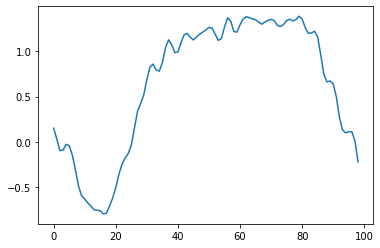

In [84]:
data = m1;

# variable du problème
x = cp.Variable(L)
lambd = 12.47
# fonction objectif
objective = cp.Minimize( cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)) + lambd * cp.norm(x, 2))
# /!\ cp.conv renvoie un tableau 2D

# constraintes
constraints = []

# définition du problème
prob = cp.Problem(objective, constraints)

# résolution
result = prob.solve()

# visualisation
plt.plot(x.value);

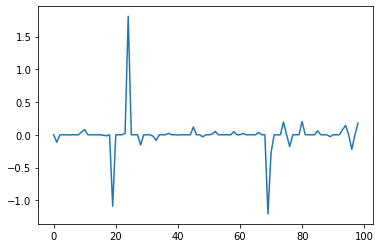

In [32]:
data = m2;

# variable du problème
x = cp.Variable(L)
lambd = 0.1
# fonction objectif
objective = cp.Minimize( cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)) + lambd * cp.norm(x,1))
# /!\ cp.conv renvoie un tableau 2D

# constraintes
constraints = []

# définition du problème
prob = cp.Problem(objective, constraints)

# résolution
result = prob.solve()

# visualisation
plt.plot(x.value);

In [123]:
x.value.shape

(99,)

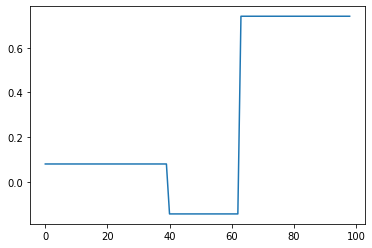

In [120]:
data = m3;

# variable du problème
x = cp.Variable(L)
lambd = 1e3
# fonction objectif
objective = cp.Minimize( cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)) + lambd * cp.norm(cp.diff(x),1))
# /!\ cp.conv renvoie un tableau 2D

# constraintes
constraints = []

# définition du problème
prob = cp.Problem(objective, constraints)

# résolution
result = prob.solve()

# visualisation
plt.plot(x.value);

**Question 5** : en adaptant le code de la question 2, estimer les trois signaux en testant différents paramètres de régularisation, en faisant apparaître des cas où $\lambda$ est manifestement sur- ou sous-évalué, et où $\lambda$ paraît pertinent.

Valeurs conseillées des paramètres de régularisation :
- $10^{-3} \leq \lambda_1 \leq 10^5$
- $10^{-2} \leq \lambda_1 \leq 10^1$
- $10^{-2} \leq \lambda_1 \leq 10^3$

On pourra utiliser `cp.diff` et `cp.norm`.

## Courbe en L

**Question 6** : tracer la courbe en L pour déterminer le paramètre de régularisation.

In [56]:
from tqdm import tqdm

In [75]:
# Pour le signal 1
def solve1(lambd):
    data = m1;

    # variable du problème
    x = cp.Variable(L)
    # fonction objectif
    objective = cp.Minimize( cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)) + lambd * cp.norm(x, 2))
    # /!\ cp.conv renvoie un tableau 2D
    # constraintes
    constraints = []
    # définition du problème
    prob = cp.Problem(objective, constraints)
    # résolution
    result = prob.solve()
    # visualisation
    return cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)).value , cp.norm(x, 2).value

lambdas = np.linspace(1e-3, 100, 1000)
attache_donnee = []
regularisation = []

for lambd in tqdm(lambdas):
    temp = solve1(lambd)
    attache_donnee.append(temp[0])
    regularisation.append(temp[1])

100%|██████████| 1000/1000 [00:17<00:00, 56.61it/s]


In [77]:
# Now let's detect the knee 
from kneed import KneeLocator

In [81]:
kn = KneeLocator(regularisation, attache_donnee, curve='concave', direction='increasing')
knee = kn.knee

In [82]:
knee

12.472483172879578

Text(0, 0.5, 'attache_donnee')

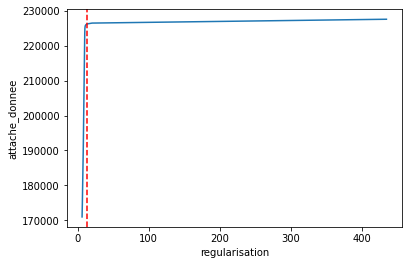

In [83]:
plt.plot(regularisation, attache_donnee)
plt.axvline(x=knee, color='r', linestyle='--')
plt.xlabel('regularisation')
plt.ylabel("attache_donnee")

In [85]:
# the second signal
def solve2(lambd):
    data = m2;

    # variable du problème
    x = cp.Variable(L)
    # fonction objectif
    objective = cp.Minimize( cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)) + lambd * cp.norm(x,1))
    # /!\ cp.conv renvoie un tableau 2D
    # constraintes
    constraints = []
    # définition du problème
    prob = cp.Problem(objective, constraints)
    # résolution
    result = prob.solve()
    # visualisation
    return cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)).value , cp.norm(x, 1).value

lambdas = np.linspace(1e-2, 1, 1000)
attache_donnee = []
regularisation = []

for lambd in tqdm(lambdas):
    temp = solve2(lambd)
    attache_donnee.append(temp[0])
    regularisation.append(temp[1])

100%|██████████| 1000/1000 [00:23<00:00, 42.03it/s]


8.464669978610214


Text(0, 0.5, 'attache_donnee')

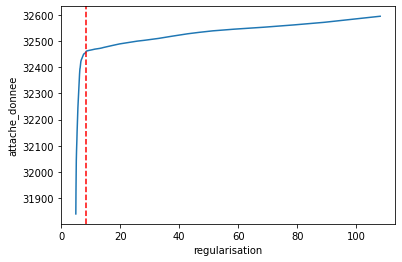

In [86]:
kn = KneeLocator(regularisation, attache_donnee, curve='concave', direction='increasing')
knee = kn.knee
print(knee)
plt.plot(regularisation, attache_donnee)
plt.axvline(x=knee, color='r', linestyle='--')
plt.xlabel('regularisation')
plt.ylabel("attache_donnee")

In [87]:
# the second signal
def solve3(lambd):
    data = m3;

    # variable du problème
    x = cp.Variable(L)
    # fonction objectif
    objective = cp.Minimize( cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)) + lambd * cp.norm(cp.diff(x),1))
    # /!\ cp.conv renvoie un tableau 2D
    # constraintes
    constraints = []
    # définition du problème
    prob = cp.Problem(objective, constraints)
    # résolution
    result = prob.solve()
    # visualisation
    return cp.sum_squares(cp.conv(h,x)-data.reshape(-1,1)).value , cp.norm(cp.diff(x),1).value

lambdas = np.linspace(1e-2, 1e3, 1000)
attache_donnee = []
regularisation = []

for lambd in tqdm(lambdas):
    temp = solve2(lambd)
    attache_donnee.append(temp[0])
    regularisation.append(temp[1])

100%|██████████| 1000/1000 [00:13<00:00, 74.37it/s]


4.9140123992754905


Text(0, 0.5, 'attache_donnee')

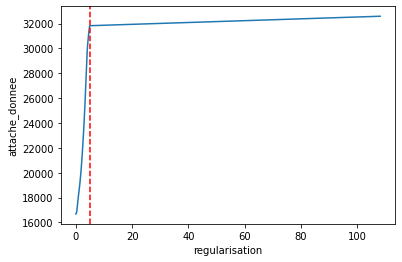

In [88]:
kn = KneeLocator(regularisation, attache_donnee, curve='concave', direction='increasing')
knee = kn.knee
print(knee)
plt.plot(regularisation, attache_donnee)
plt.axvline(x=knee, color='r', linestyle='--')
plt.xlabel('regularisation')
plt.ylabel("attache_donnee")

## Algorithm ISTA

**Question 7** (optionnel) : implémenter l'algorithm ISTA pour la régularisation $\ell_1$.

In [100]:
H.shape

(119, 99)

In [124]:
def soft_threshold(x, threshold):
    """
    Soft threshold function for ISTA.
    """
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

def ista(A, y, lambda_, alpha=1.0, max_iter=100, tol=1e-4):
    """
    ISTA algorithm for L1-regularized least squares problem.
    """
    n_features = A.shape[1]
    x = np.zeros(n_features)
    loss_history = []
    
    for i in range(max_iter):
        # Compute gradient and update x
        grad = A.T @ (A @ x - y)
        
        x_new = soft_threshold(x - alpha * grad, lambda_ * alpha)

        # Check convergence
        # loss = np.sum(np.square(y - A @ x_new)) + lambda_ * np.sum(np.abs(x_new))
        # loss_history.append(loss)
        # if i > 0 and np.abs(loss_history[-1] - loss_history[-2]) / loss_history[-1] < tol:
        #     break
        
        x = x_new
    
    return x

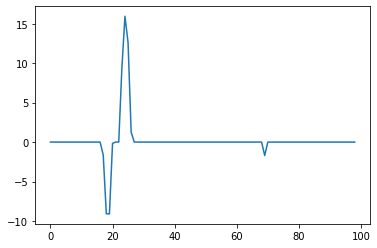

In [131]:
# Now let's test on data 2s
x = ista(H, m2, 20,max_iter = 1)
plt.plot(x)

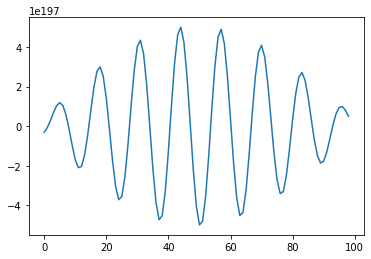

In [119]:
plt.plot(x)